# Deep Fruits - Image Recognition

### General Modules

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import cv2
import os

## Load Training and Validation Data

In [3]:
# Data downloaded from:
# https://www.kaggle.com/moltean/fruits/data
# unziped and "fruits-360" folder placed on root (same folder as this notebook)

# Define paths to both training and validation data
train_path = 'fruits-360/Training/*'
valid_path = 'fruits-360/Validation/*'

In [4]:
def loadData(path):
    ''' Load the images and labels to raw numpy arrays
    Args: 
        path (str), path to folder to parse
        images (list), empty list where array of images will be stored
        labels (list), empty list where lables will be stored
    return:
        images (list, numpy array), contains the images loaded
        labels (list, numpy array), contains the labels for each image
    '''
    
    images = []
    labels = []
    
    # Count the unique labels in the set
    unique_labels = []
    
    for folder in glob.glob(path):
        label = folder.split('/')[-1]
        
        for file in glob.glob(os.path.join(folder, '*.jpg')):
            image = cv2.imread(file, cv2.IMREAD_COLOR)
            # imread loads an image from the specified file and returns it
            image = cv2.resize(image, (45, 45))
            # resize resizes the image to the specified size
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            # converts an input image from one color space to another
            
            images.append(image)
            labels.append(label)
        
        # Append to unique labels in the set
        unique_labels.append(label)
    
    images = np.array(images)
    labels = np.array(labels)
    
    print('%s has %s unique labels, as follows %s' %(path, len(unique_labels), unique_labels))
    print(' ')
    print('%s contains %s images and %s labels' %(path, len(images), len(labels)))
    
    return images, labels

In [5]:
# TRAINING Data labels and description
train_images, train_labels = loadData(train_path)

fruits-360/Training/* has 60 unique labels, as follows ['Pear Abate', 'Carambula', 'Apple Red Yellow', 'Peach Flat', 'Apple Red Delicious', 'Maracuja', 'Lemon Meyer', 'Grapefruit Pink', 'Grape White', 'Plum', 'Salak', 'Peach', 'Mandarine', 'Papaya', 'Passion Fruit', 'Apple Golden 2', 'Strawberry', 'Pineapple', 'Kaki', 'Raspberry', 'Apple Golden 3', 'Guava', 'Cocos', 'Mango', 'Apple Golden 1', 'Quince', 'Banana', 'Tangelo', 'Huckleberry', 'Apple Braeburn', 'Apple Red 2', 'Pitahaya Red', 'Limes', 'Dates', 'Pear', 'Pomegranate', 'Granadilla', 'Apricot', 'Clementine', 'Apple Granny Smith', 'Grape Pink', 'Pear Monster', 'Pear Williams', 'Kiwi', 'Kumquats', 'Cherry', 'Tamarillo', 'Nectarine', 'Apple Red 3', 'Banana Red', 'Avocado', 'Grapefruit White', 'Lemon', 'Litchi', 'Avocado ripe', 'Cactus fruit', 'Apple Red 1', 'Orange', 'Pepino', 'Grape White 2']
 
fruits-360/Training/* contains 28736 images and 28736 labels


In [6]:
# VALIDATION Data labels and description
valid_images, valid_labels = loadData(valid_path)

fruits-360/Validation/* has 60 unique labels, as follows ['Pear Abate', 'Carambula', 'Apple Red Yellow', 'Peach Flat', 'Apple Red Delicious', 'Maracuja', 'Lemon Meyer', 'Grapefruit Pink', 'Grape White', 'Plum', 'Salak', 'Peach', 'Mandarine', 'Papaya', 'Passion Fruit', 'Apple Golden 2', 'Strawberry', 'Pineapple', 'Kaki', 'Raspberry', 'Apple Golden 3', 'Guava', 'Cocos', 'Mango', 'Apple Golden 1', 'Quince', 'Banana', 'Tangelo', 'Huckleberry', 'Apple Braeburn', 'Apple Red 2', 'Pitahaya Red', 'Limes', 'Dates', 'Pear', 'Pomegranate', 'Granadilla', 'Apricot', 'Clementine', 'Apple Granny Smith', 'Grape Pink', 'Pear Monster', 'Pear Williams', 'Kiwi', 'Kumquats', 'Cherry', 'Tamarillo', 'Nectarine', 'Apple Red 3', 'Banana Red', 'Avocado', 'Grapefruit White', 'Lemon', 'Litchi', 'Avocado ripe', 'Cactus fruit', 'Apple Red 1', 'Orange', 'Pepino', 'Grape White 2']
 
fruits-360/Validation/* contains 9673 images and 9673 labels


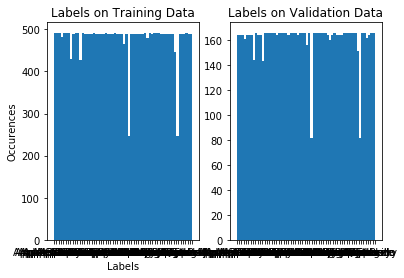

In [7]:
# Is the Data balanced?
plt.subplot(121)
plt.hist(train_labels, bins=60)
plt.title('Labels on Training Data')
plt.xlabel('Labels')
plt.ylabel('Occurences')
plt.subplot(122)
plt.hist(valid_labels, bins=60)
plt.title('Labels on Validation Data')
plt.show()

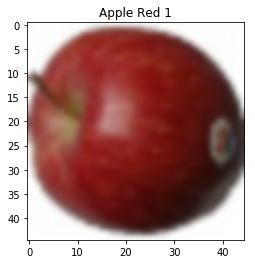

In [8]:
# Show a random TRAINING image and its label
rmd=np.random.randint(0,len(train_images))
plt.title(train_labels[rmd])
plt.imshow(np.asarray(train_images[rmd],dtype="uint8"),interpolation="bicubic")

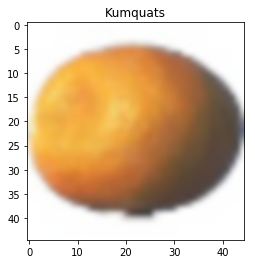

In [9]:
# Show a random VALIDATION image and its label
rmd=np.random.randint(0,len(valid_images))
plt.title(valid_labels[rmd])
plt.imshow(np.asarray(valid_images[rmd],dtype="uint8"),interpolation="bicubic")

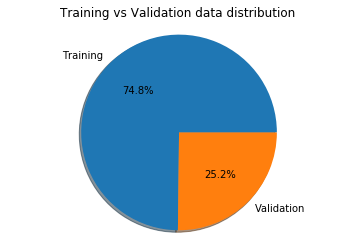

In [10]:
# Training and validation data distribution
labels = 'Training', 'Validation'
sizes = [len(train_images), len(valid_images)]

fig1, ax1 = plt.subplots()
plt.title('Training vs Validation data distribution')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Training and Validation Data Normalization

In [11]:
#ToDo

### Convert to one hot
There are 60 different classes (labels) possible

In [30]:
def convertToOneHot(vector, num_classes=None):
    result = np.zeros((len(vector), num_classes), dtype='int32')
    result[np.arange(len(vector)), vector] = 1
    return result

#### Convert Labels to integers

In [24]:
train_labels_dict = {}
label_count = -1
for train_label in train_labels:
    if train_label not in train_labels_dict.keys():
        train_labels_dict[train_label] = label_count + 1
        label_count += 1

train_labels_dict

{'Apple Braeburn': 29,
 'Apple Golden 1': 24,
 'Apple Golden 2': 15,
 'Apple Golden 3': 20,
 'Apple Granny Smith': 39,
 'Apple Red 1': 56,
 'Apple Red 2': 30,
 'Apple Red 3': 48,
 'Apple Red Delicious': 4,
 'Apple Red Yellow': 2,
 'Apricot': 37,
 'Avocado': 50,
 'Avocado ripe': 54,
 'Banana': 26,
 'Banana Red': 49,
 'Cactus fruit': 55,
 'Carambula': 1,
 'Cherry': 45,
 'Clementine': 38,
 'Cocos': 22,
 'Dates': 33,
 'Granadilla': 36,
 'Grape Pink': 40,
 'Grape White': 8,
 'Grape White 2': 59,
 'Grapefruit Pink': 7,
 'Grapefruit White': 51,
 'Guava': 21,
 'Huckleberry': 28,
 'Kaki': 18,
 'Kiwi': 43,
 'Kumquats': 44,
 'Lemon': 52,
 'Lemon Meyer': 6,
 'Limes': 32,
 'Litchi': 53,
 'Mandarine': 12,
 'Mango': 23,
 'Maracuja': 5,
 'Nectarine': 47,
 'Orange': 57,
 'Papaya': 13,
 'Passion Fruit': 14,
 'Peach': 11,
 'Peach Flat': 3,
 'Pear': 34,
 'Pear Abate': 0,
 'Pear Monster': 41,
 'Pear Williams': 42,
 'Pepino': 58,
 'Pineapple': 17,
 'Pitahaya Red': 31,
 'Plum': 9,
 'Pomegranate': 35,
 'Quinc

In [23]:
train_labels_int = []
for train_label_int in train_labels:
    train_labels_int.append(train_labels_dict[train_label_int])

train_labels_int[0]

0

In [29]:
train_labels[0]

'Pear Abate'

In [ ]:
# Need to first convert the list of string labels to an int for the label, i.e. from 0 to 59
# Something like results = list(map(int, results))? or a loop?

In [33]:
train_labels_onehot = convertToOneHot(train_labels_int, num_classes=60)

In [34]:
train_labels_onehot

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int32)

## Define Network

### Network Modules

In [35]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


### Layers

In [36]:
# Variables
'Training input has %s, training labels has %s' %(train_images.shape, train_labels.shape)

'Training input has (28736, 45, 45, 3), training labels has (28736,)'

In [37]:
# Input shapes
inp_col = train_images.shape[1]
inp_row = train_images.shape[2]
inp_cha = 3
# Variables are train_images, train_labels and valid_images, valid_labels

In [38]:
'Input shape is %s cols by %s rows with %s channels' %(inp_col, inp_row, inp_cha)

'Input shape is 45 cols by 45 rows with 3 channels'

### Model 1: First run with a Fully Connected

In [39]:
# Image flattening for the FC network

train_flatten=np.zeros([len(train_images), 45*45*3])
for i in range(0, len(train_images)):
    train_flatten[i]=np.reshape(train_images[i], newshape=((45*45*3),))
    
valid_flatten=np.zeros([len(valid_images), 45*45*3])
for i in range(0, len(valid_images)):
    valid_flatten[i]=np.reshape(valid_images[i], newshape=((45*45*3),))

'After flattening, training input has %s and valisation input has %s' %(train_flatten.shape, valid_flatten.shape)

'After flattening, training input has (28736, 6075) and valisation input has (9673, 6075)'

In [44]:
batch_size = 128
nb_classes = 60  # Labels
nb_epoch = 30

In [45]:
# Simple Fully Connected Network
# No normalization, no dropout

model = Sequential()
name = 'simple_fc'

model.add(Dense(300, input_dim=(inp_col*inp_row*inp_cha)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(300))
#model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(300))
#model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Model 1 Summary

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 300)               1822800   
_________________________________________________________________
activation_5 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               90300     
_________________________________________________________________
activation_6 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 300)               90300     
_________________________________________________________________
activation_7 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 60)                18060     
__________

### Model 1: Forward Pass of untrained network

In [47]:
model.evaluate(train_flatten, train_labels_onehot)

28736/28736 [==============================] - 7s 242us/step


[15.905486493970875, 0.0089782850779510023]

## Train

In [ ]:
#ToDo

## Evaluate